# Sistema de detección de enlaces spam

In [52]:
import pandas as pd
import regex as re 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Cargar los datos con los que trabajaremos

In [30]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv")
total_data.head(5)

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


# 2. Tratamiento de los datos

In [31]:
#Transformación numérica
total_data["is_spam"] = total_data["is_spam"].apply(lambda x: 1 if x else 0).astype(int)
total_data.head(5)

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


In [32]:
#Eliminamos los valores duplicados
print(f"Las dimensiones del dataframe son: {total_data.shape}.")
total_data = total_data.drop_duplicates()
total_data = total_data.reset_index(inplace = False, drop = True)
print(f"La nueva dimensión del dataframe tras eliminar los duplicados: {total_data.shape}")

Las dimensiones del dataframe son: (2999, 2).
La nueva dimensión del dataframe tras eliminar los duplicados: (2369, 2)


In [33]:
#Diferenciamos entre spam y no spam
print(f"Correo spam: {len(total_data.loc[total_data.is_spam == 1])}")
print(f"Correo no spam: {len(total_data.loc[total_data.is_spam == 0])}")

Correo spam: 244
Correo no spam: 2125


In [34]:
#Tratamos los textos
def preprocess_text(text):
    text = re.sub(r'[^a-z ]', " ", text)
    
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)

    text = re.sub(r'\s+', " ", text.lower())

    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)

    return text.split()

total_data["url"] = total_data["url"].apply(preprocess_text)
total_data.head()

,url,is_spam
0,"[https, briefingday, us, list, manage, com, un...",1
1,"[https, www, hvper, com]",1
2,"[https, briefingday, com, v, i]",1
3,"[https, briefingday, com, m, commentform]",0
4,"[https, briefingday, com, fan]",1


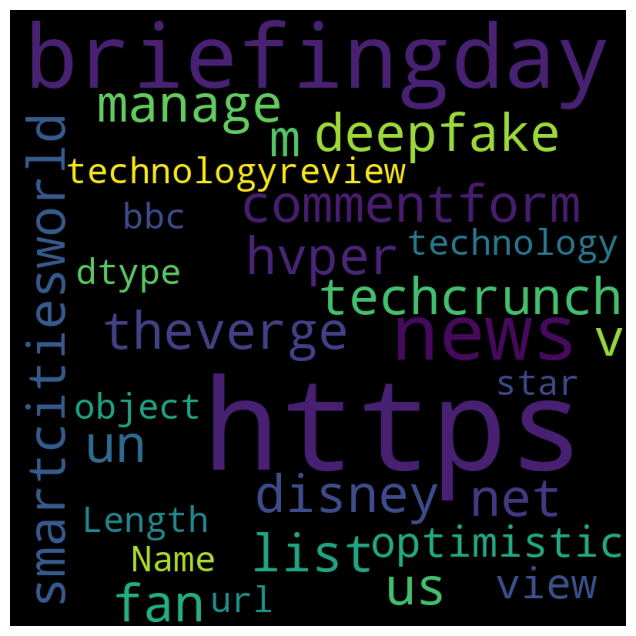

In [35]:
wordcloud = WordCloud(width = 800, height = 800, background_color = "black", max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(total_data["url"]))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
tokens_enum = total_data["url"]
tokens_enum = [" ".join(tokens) for tokens in tokens_enum]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_enum).toarray()
y = total_data["is_spam"]

X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
#Dividimos entre prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 3. Modelo SVC 

In [38]:
model = SVC(kernel = "linear", random_state = 42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [39]:
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# 4. Optimización del modelo

In [45]:
hyperparams = {
    "C": randint(0.0, 1000),
    "kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed’"],
    "degree": randint(1, 8),
    "gamma": ["scale", "auto"]
}

In [46]:
random_search = RandomizedSearchCV(
    model,
    hyperparams,
    scoring='accuracy',
    cv=5,       
    n_jobs=1,  
    random_state=42
)
random_search

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
                   n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f73f871ba40>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f73f871ac90>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid', 'precomputed’']},
                   random_state=42, scoring='accuracy')

In [47]:
random_search.fit(X_train, y_train)

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
                   n_jobs=1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f73f871ba40>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f73f871ac90>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid', 'precomputed’']},
                   random_state=42, scoring='accuracy')

In [48]:
print("The best hyperparameters are:", random_search.best_params_)

The best hyperparameters are: {'C': 560, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [53]:
opt_model = SVC(C = 560, degree = 3, gamma = "scale", kernel = "poly", random_state = 42)
opt_model.fit(X_train, y_train)
y_pred = opt_model.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.9620253164556962

In [55]:
#Guardamos el modelo
dump(model, open("../models/svm_classifier_C-560_deg-3_gam-scale_ker-poly_42.sav", "wb"))